# EDA With Red Wine Data

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [31]:
import pandas as pd
df = pd.read_csv('Resources/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [32]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [34]:
df.shape

(1599, 12)

In [35]:
##listing all the clumns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
#uniques qualities of wine
(df['quality'].unique()) #6 diff types of wines

array([5, 6, 7, 4, 8, 3])

In [37]:
#checking for any missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [38]:
#finding duplicate records
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [39]:
##removing duplicates
print(f"shape before droping duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"shape after droping duplicates: {df.shape}")

shape before droping duplicates: (1599, 12)
shape after droping duplicates: (1359, 12)


In [40]:
#correlation
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

<Axes: >

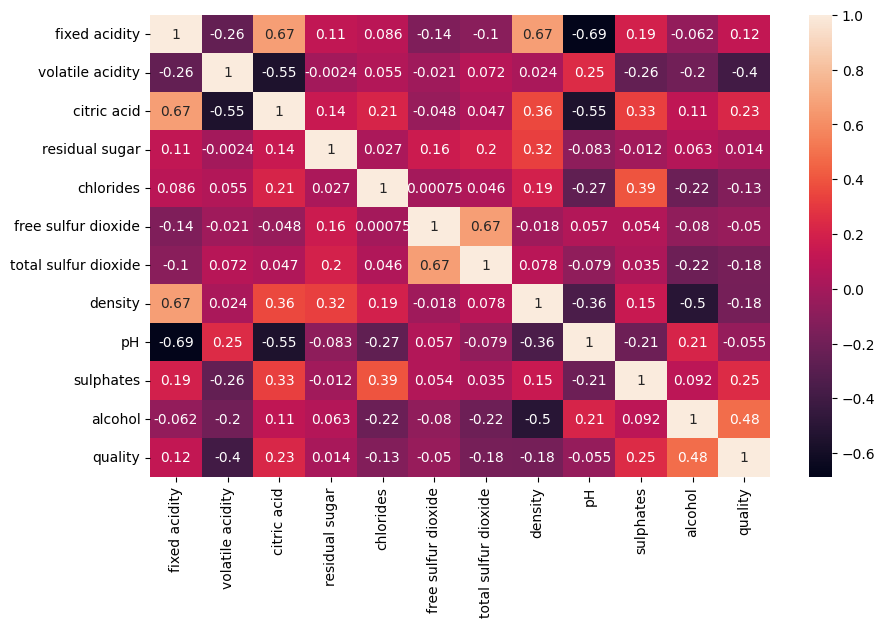

In [43]:
#visualizing correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [52]:
#unique values
df['quality'].value_counts()
#conclusion- It is an imbalanced dataset

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

Text(0, 0.5, 'Count')

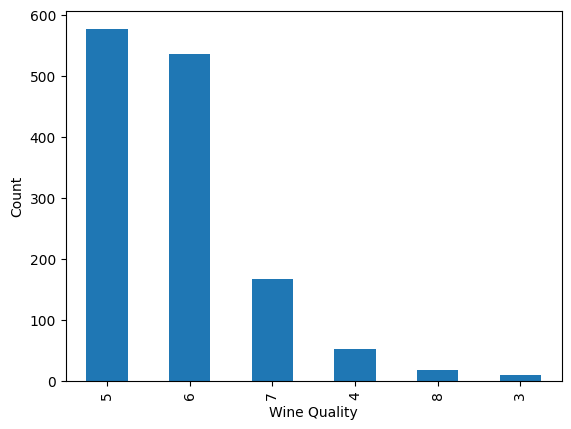

In [58]:
#visualizing value counts
df.quality.value_counts().plot(kind='bar')
plt.xlabel('Wine Quality')
plt.ylabel('Count')

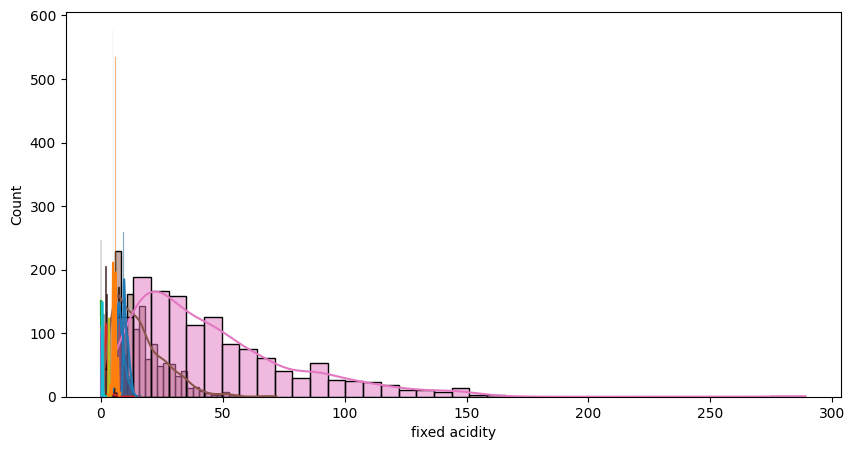

In [65]:
#hislplot for every feature in the dataset
plt.figure(figsize=(10,5))
for clm in df.columns:
    sns.histplot(df[clm],kde=True)

<Axes: xlabel='alcohol', ylabel='Count'>

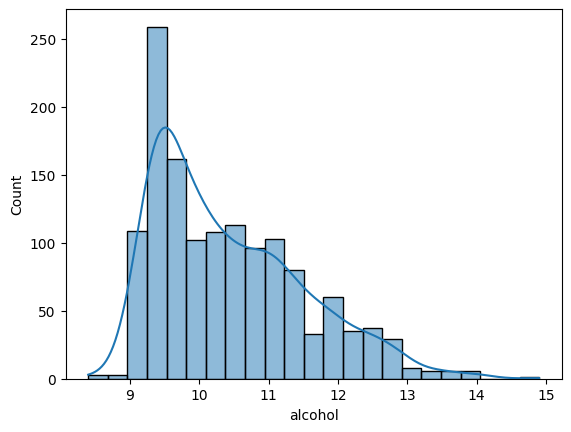

In [66]:
sns.histplot(df['alcohol'],kde=True)

### IMP: Univarient, Bivarient Analysis

/home/asit/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


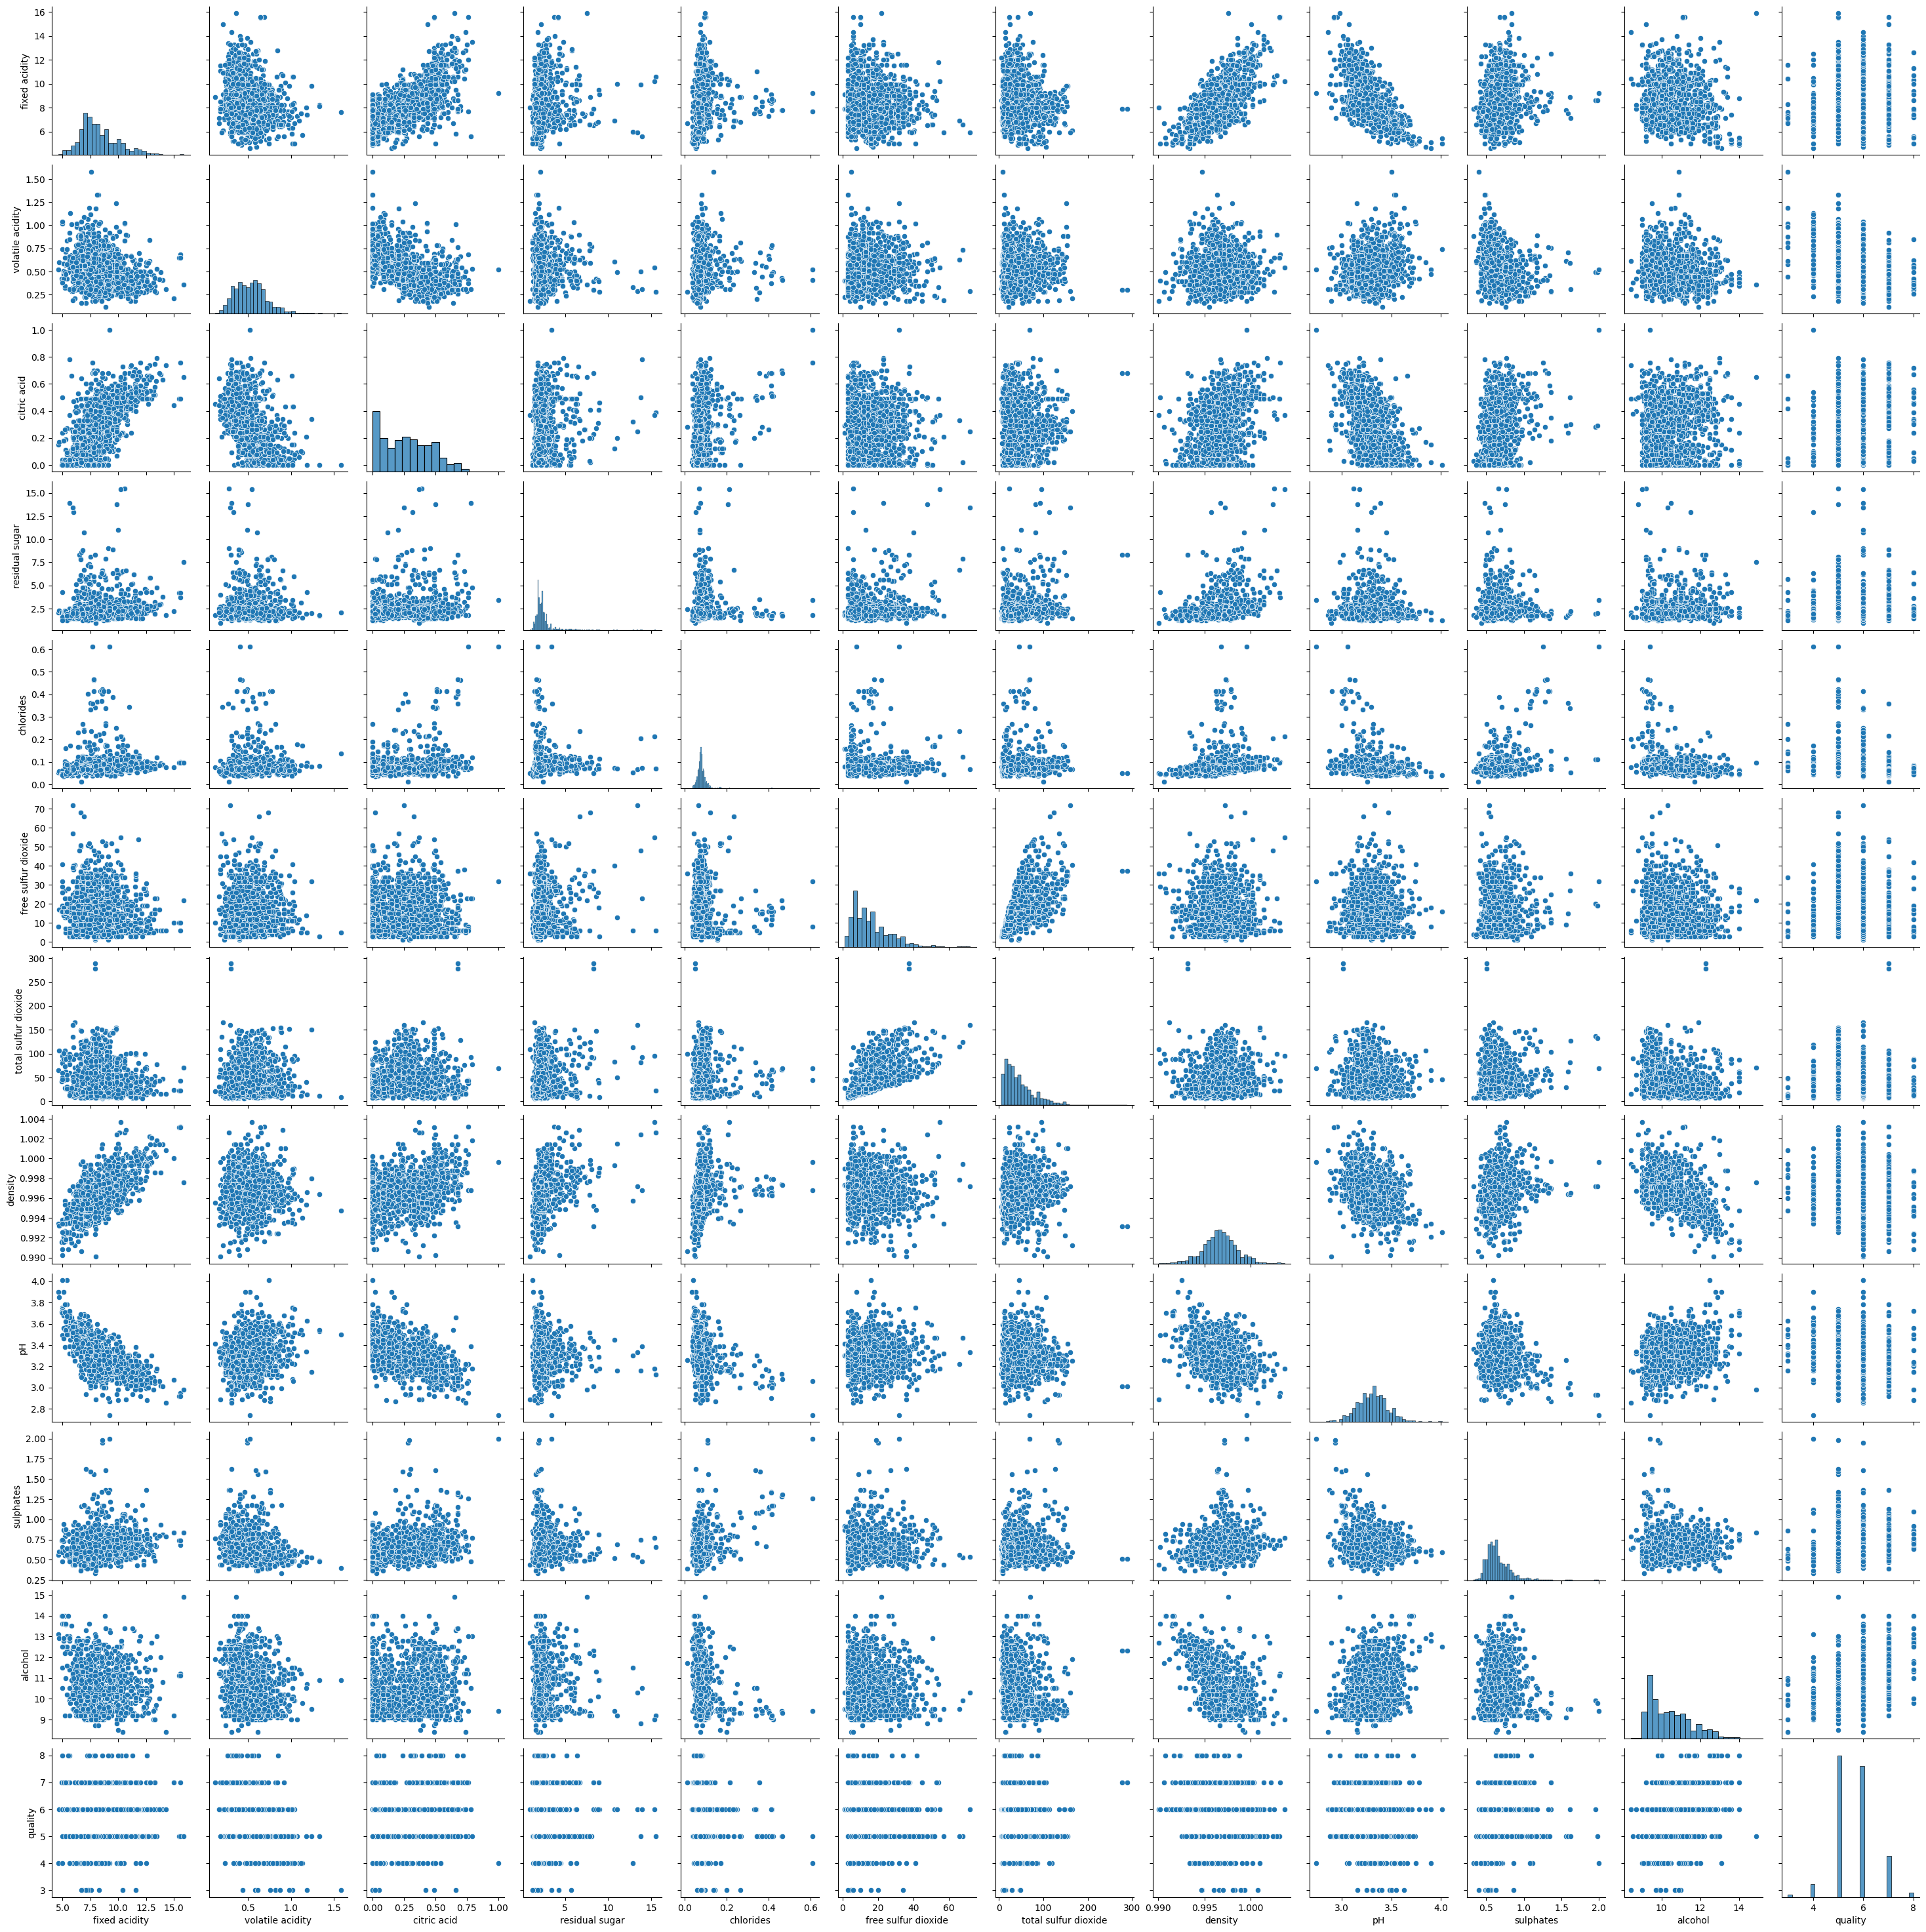

In [67]:
#Univarient, Bivarient Analysis
sns.pairplot(df)

plot picture:

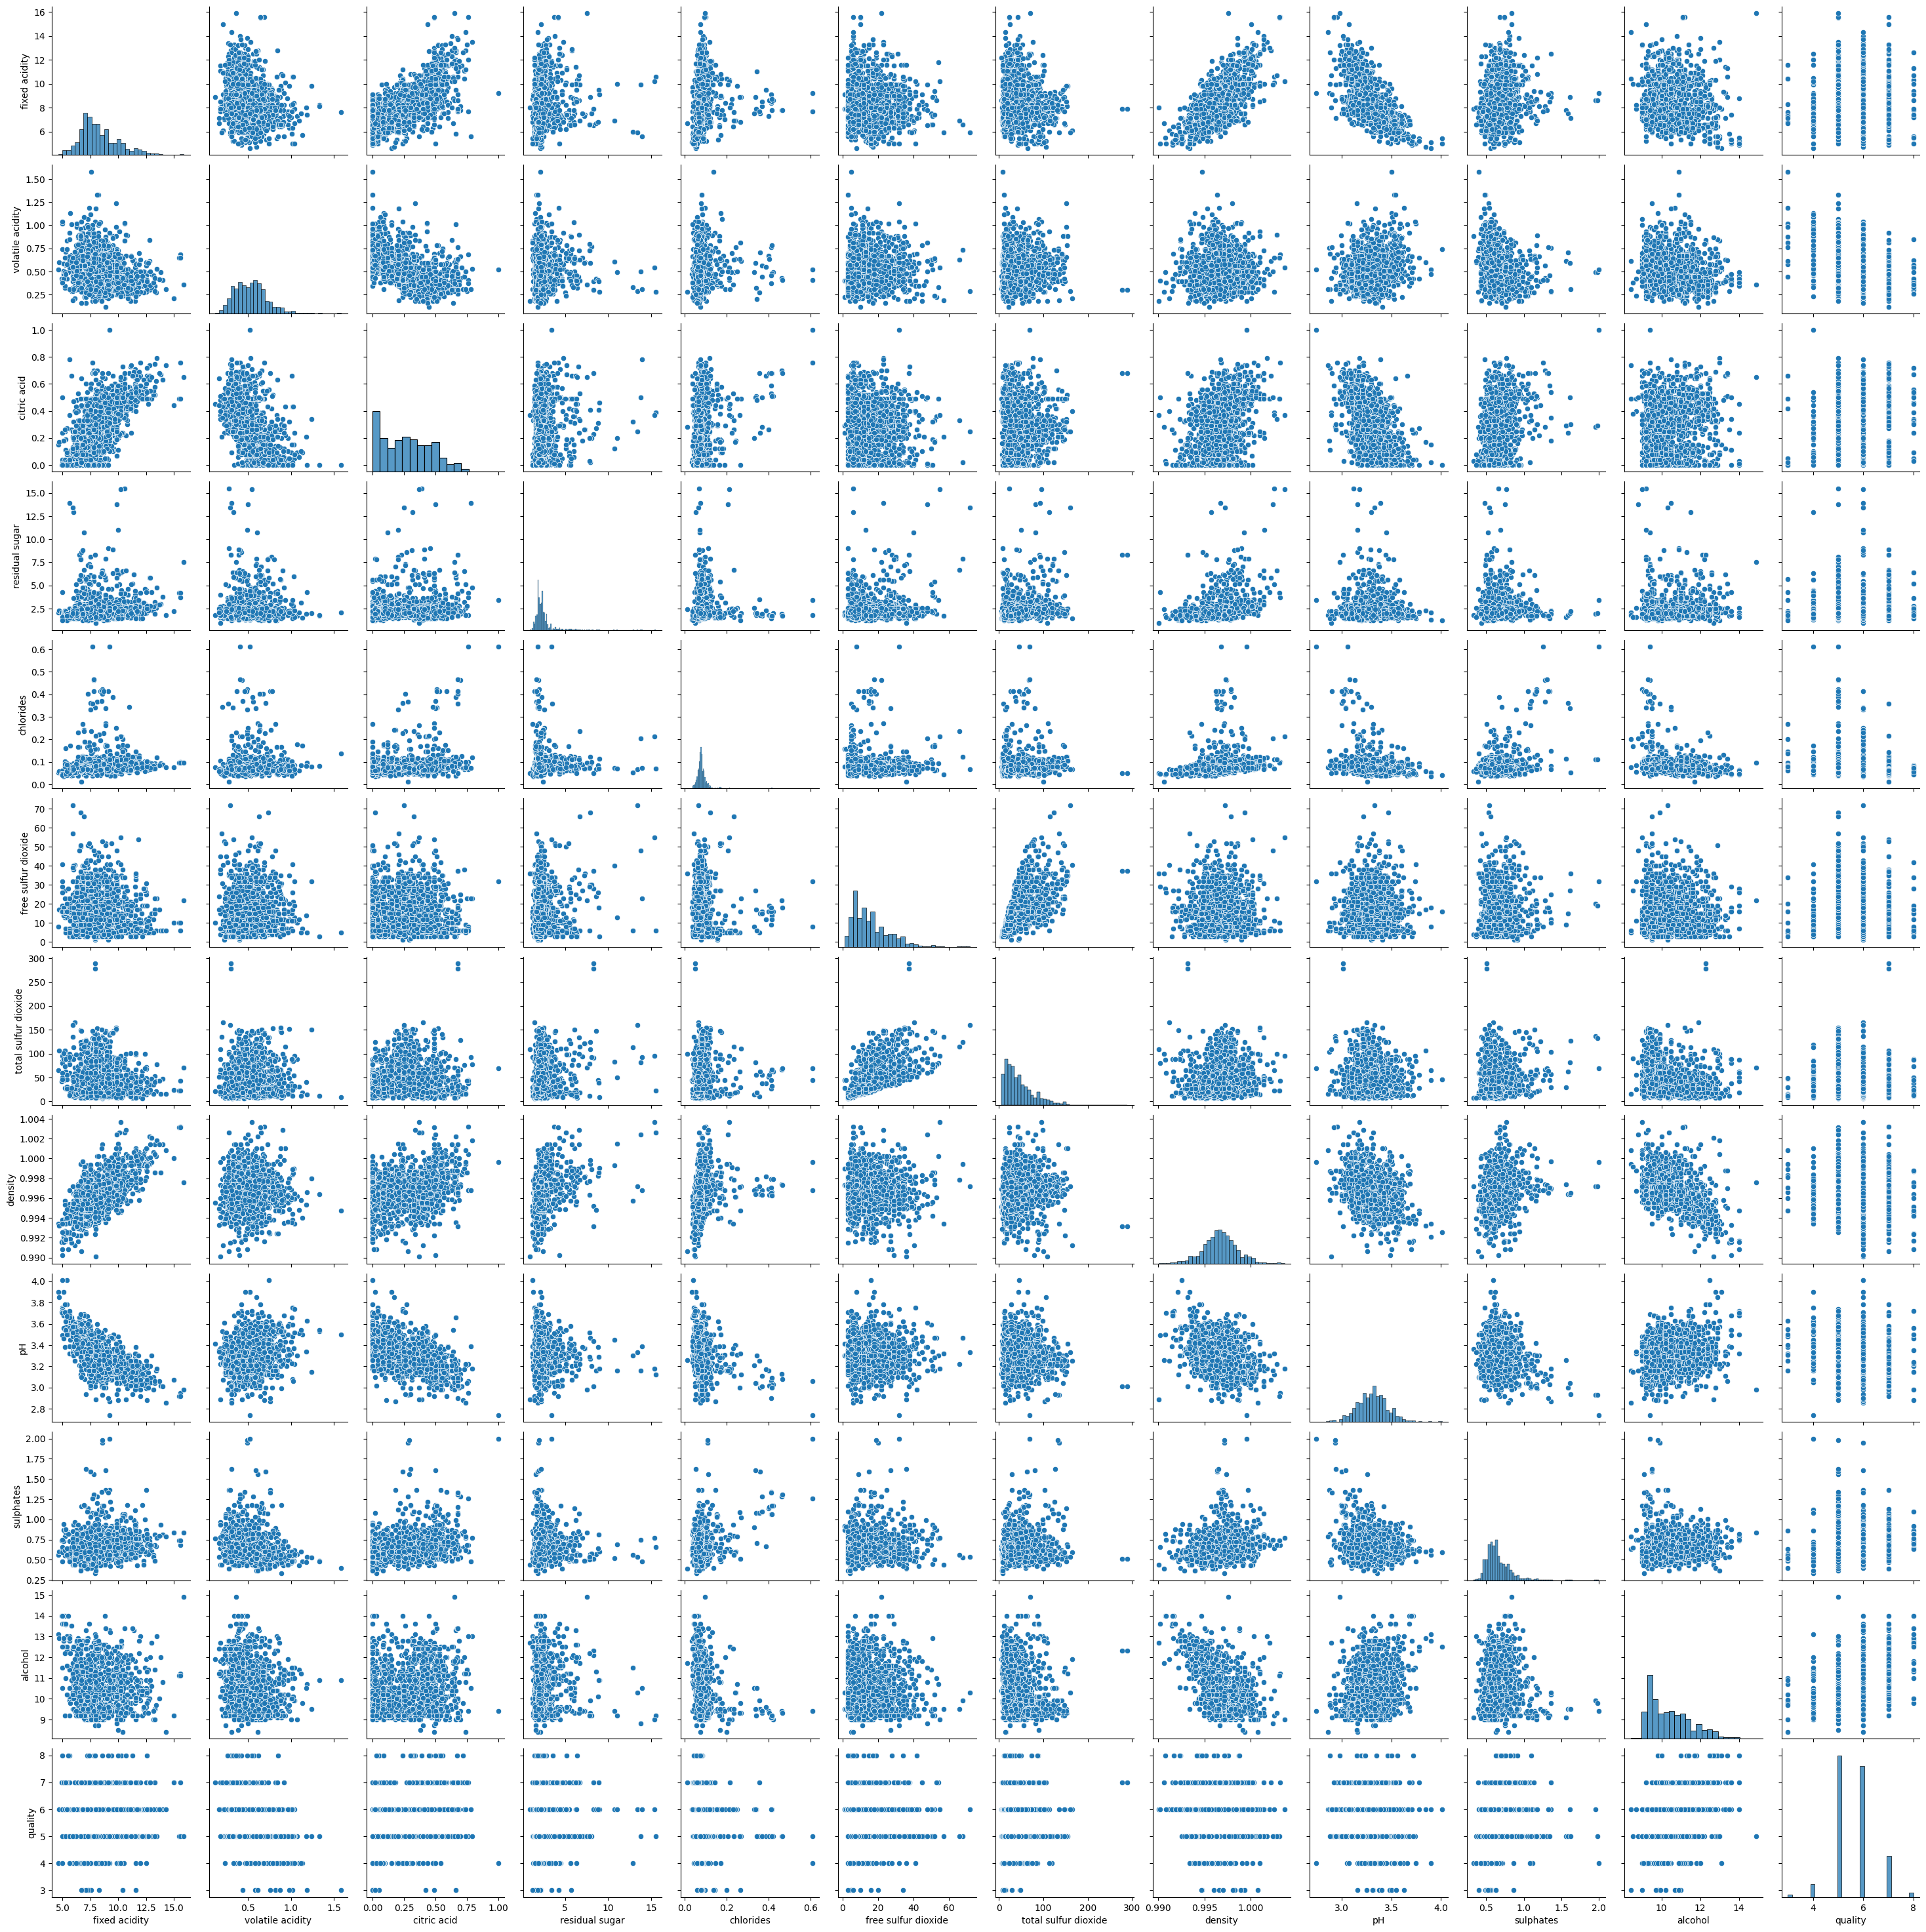

/home/asit/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


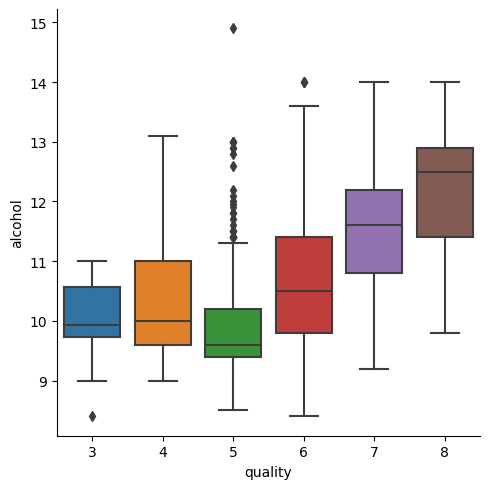

In [68]:
##categorical Plot
sns.catplot(x='quality', y='alcohol', data=df, kind="box")

<Axes: xlabel='alcohol', ylabel='pH'>

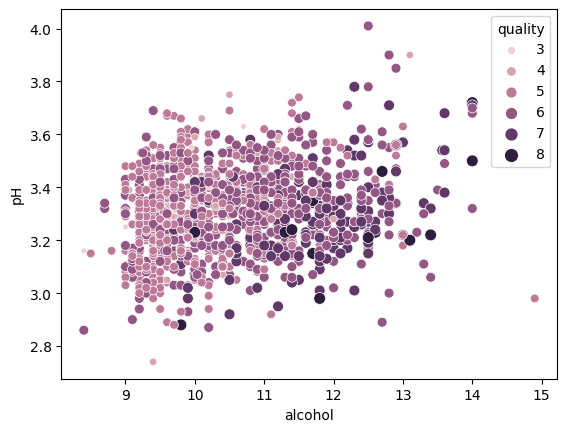

In [69]:
#scatterplot
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=df,size='quality')

# -------------------------------------------------------------------------------------------------------------

# EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

###### Practice: https://www.kaggle.com/code/timmofeyy/weather-worldwide-eda-visualization

In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #to remove any kind of warnings

#reading the dataset
df = pd.read_csv('Resources/stud.csv')
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [301]:
df.shape

(1000, 8)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [303]:
#3.1checking missing values
df.isnull().sum() 
#no missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [304]:
#3.2checking dupliccates
df[df.duplicated()] #no duplicates
# df.drop_duplicates

#or
df.duplicated().sum()

0

In [305]:
#3.3checking data types
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [306]:
## 3.4 Checking the number of uniques values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [307]:
#3.5 Check statistics of data set
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

### Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

In [310]:
#imp
print(list(df.dtypes[df.dtypes=='O'].index))
                   #or
print([feature for feature in df.columns if df[feature].dtypes=='O'])

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [311]:
#segregating numerical and categorical features
numerical_featueres = [feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
print(numerical_featueres)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [312]:
## Aggregate the total score with mean
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [365]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

lst = list(df['parental_level_of_education'].unique())

gender_encoder = LabelEncoder()
race_encoder = LabelEncoder()
edulevel_encoder = OrdinalEncoder(categories=[lst])
lunch_encoder = LabelEncoder()
course_encoder = LabelEncoder()
df['gender'] = pd.DataFrame(gender_encoder.fit_transform(df[['gender']]))
df['race_ethnicity'] = pd.DataFrame(race_encoder.fit_transform(df[['race_ethnicity']]))
df['lunch'] = pd.DataFrame(lunch_encoder.fit_transform(df[['lunch']]))
df['test_preparation_course'] = pd.DataFrame(course_encoder.fit_transform(df[['test_preparation_course']]))
df['parental_level_of_education'] = pd.DataFrame(edulevel_encoder.fit_transform(df[['parental_level_of_education']]))

In [366]:
df

gender  race_ethnicity  parental_level_of_education  lunch  \
0         0               1                          0.0      1   
1         1               2                          1.0      1   
2         2               1                          2.0      1   
3         3               0                          3.0      0   
4         1               2                          1.0      1   
..      ...             ...                          ...    ...   
995       2               4                          2.0      1   
996       4               2                          4.0      0   
997       4               2                          4.0      0   
998       1               3                          1.0      1   
999       1               3                          1.0      0   

     test_preparation_course  math_score  reading_score  writing_score  \
0                          1          72             72             74   
1                          0          69             90             88   
2                          1          90             95             93   
3                          1          47             57             44   
4                          1          76             78             75   
..                       ...         ...            ...            ...   
995                        0          88             99             95   
996                        1          62             55             55   
997                        0          59             71             65   
998                        0          68             78             77   
999                        1          77             86             86   

     total_score    average  
0            218  72.666667  
1            247  82.333333  
2            278  92.666667  
3            148  49.333333  
4            229  76.333333  
..           ...        ...  
995          282  94.000000  
996          172  57.333333  
997          195  65.000000  
998          223  74.333333  
999          249  83.000000  

[1000 rows x 10 columns]

<Axes: >

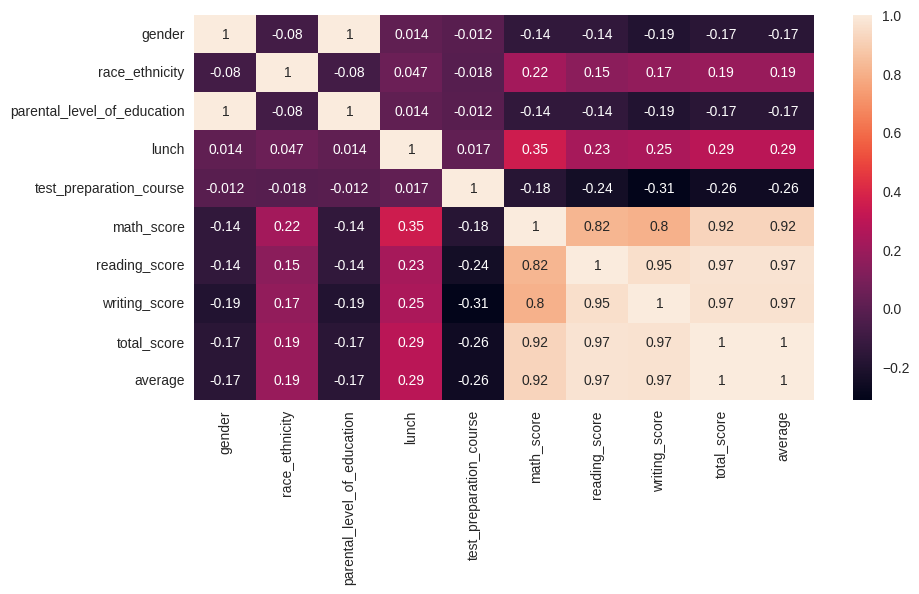

In [367]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df[df.dtypes[df.dtypes!='O'].index].corr(),annot=True,)

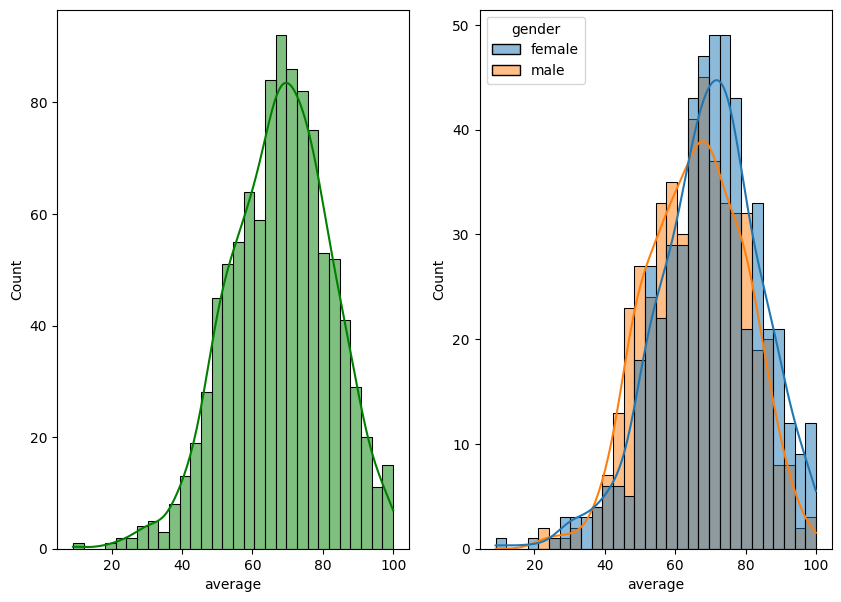

In [126]:
## Explore More Visualization
fig,axis=plt.subplots(1,2,figsize=(10,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()
#insight
#female student perform well in exams

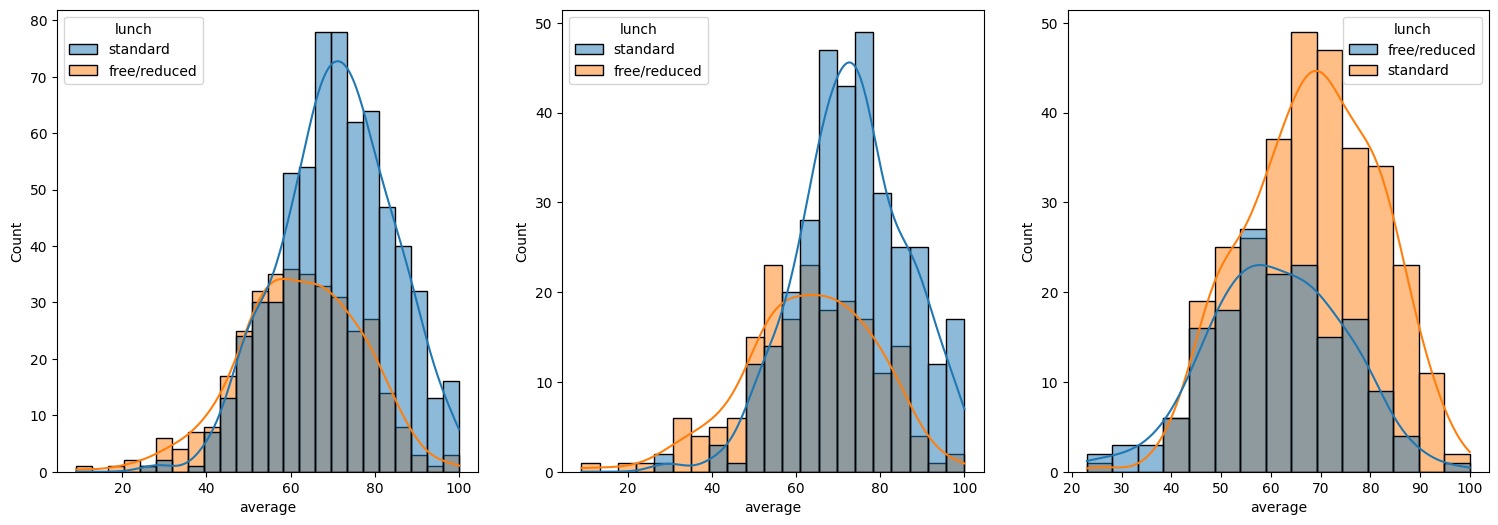

In [124]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

## Insights
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male of female

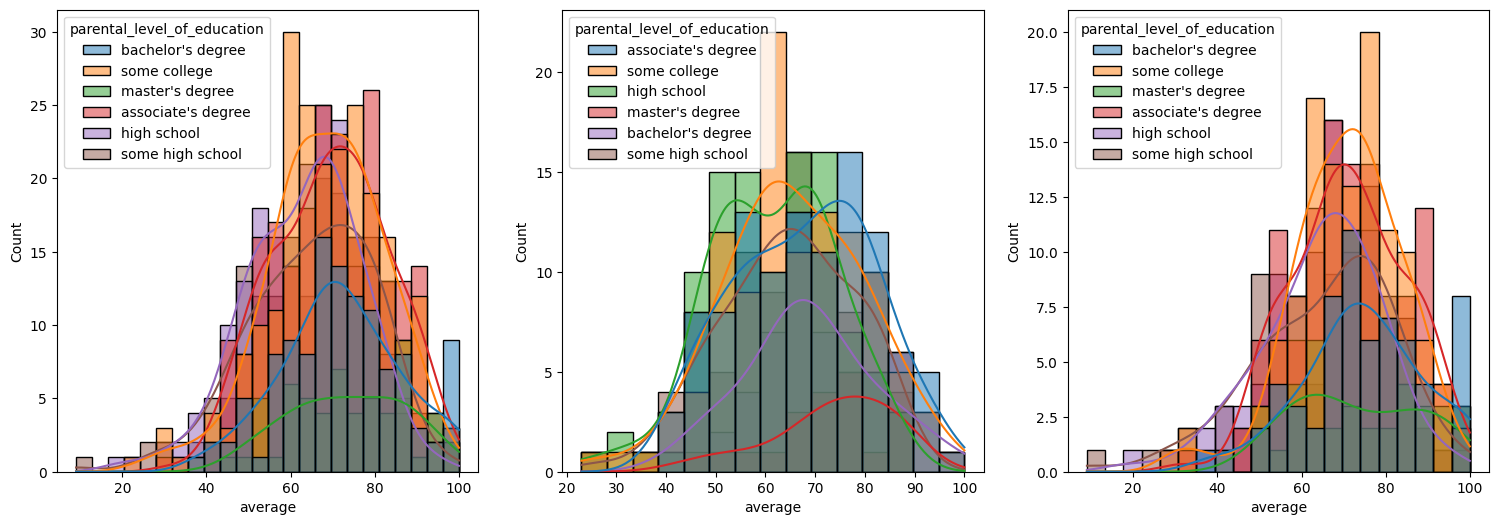

In [127]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam(cuz we have a left skew data which means avg is increasing )
- 3rd plot we can see there is no effect of parent's education on female students.

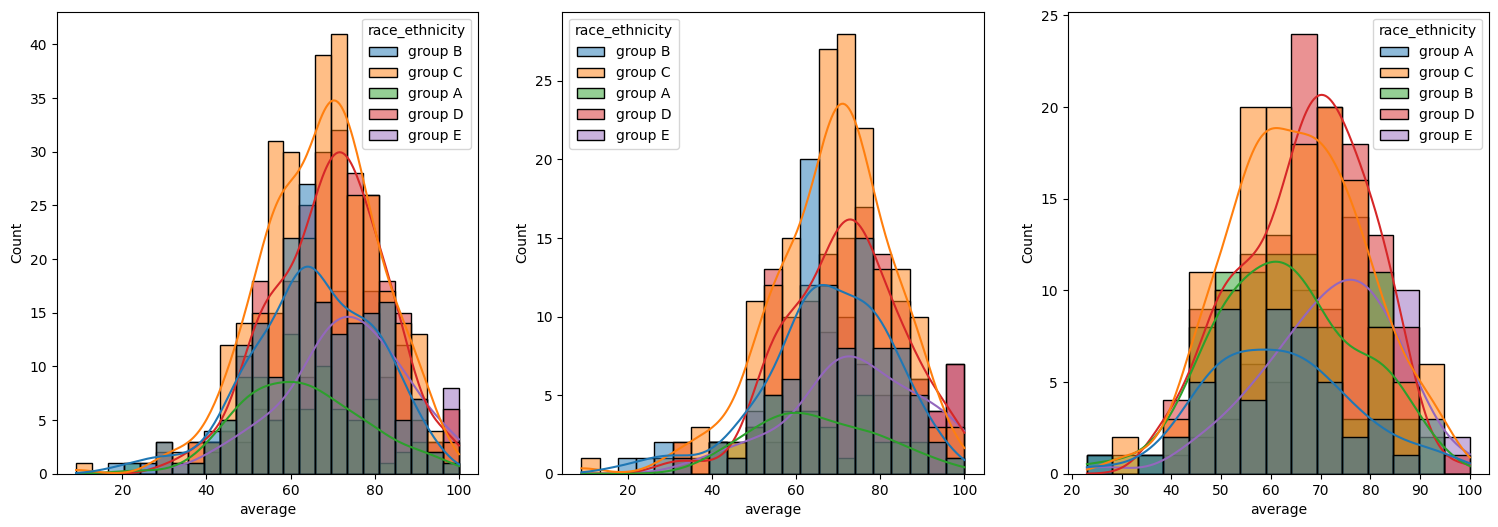

In [129]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam. (because left skewed in plot 1)
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female (because left skewed in plot 2 and plot3)

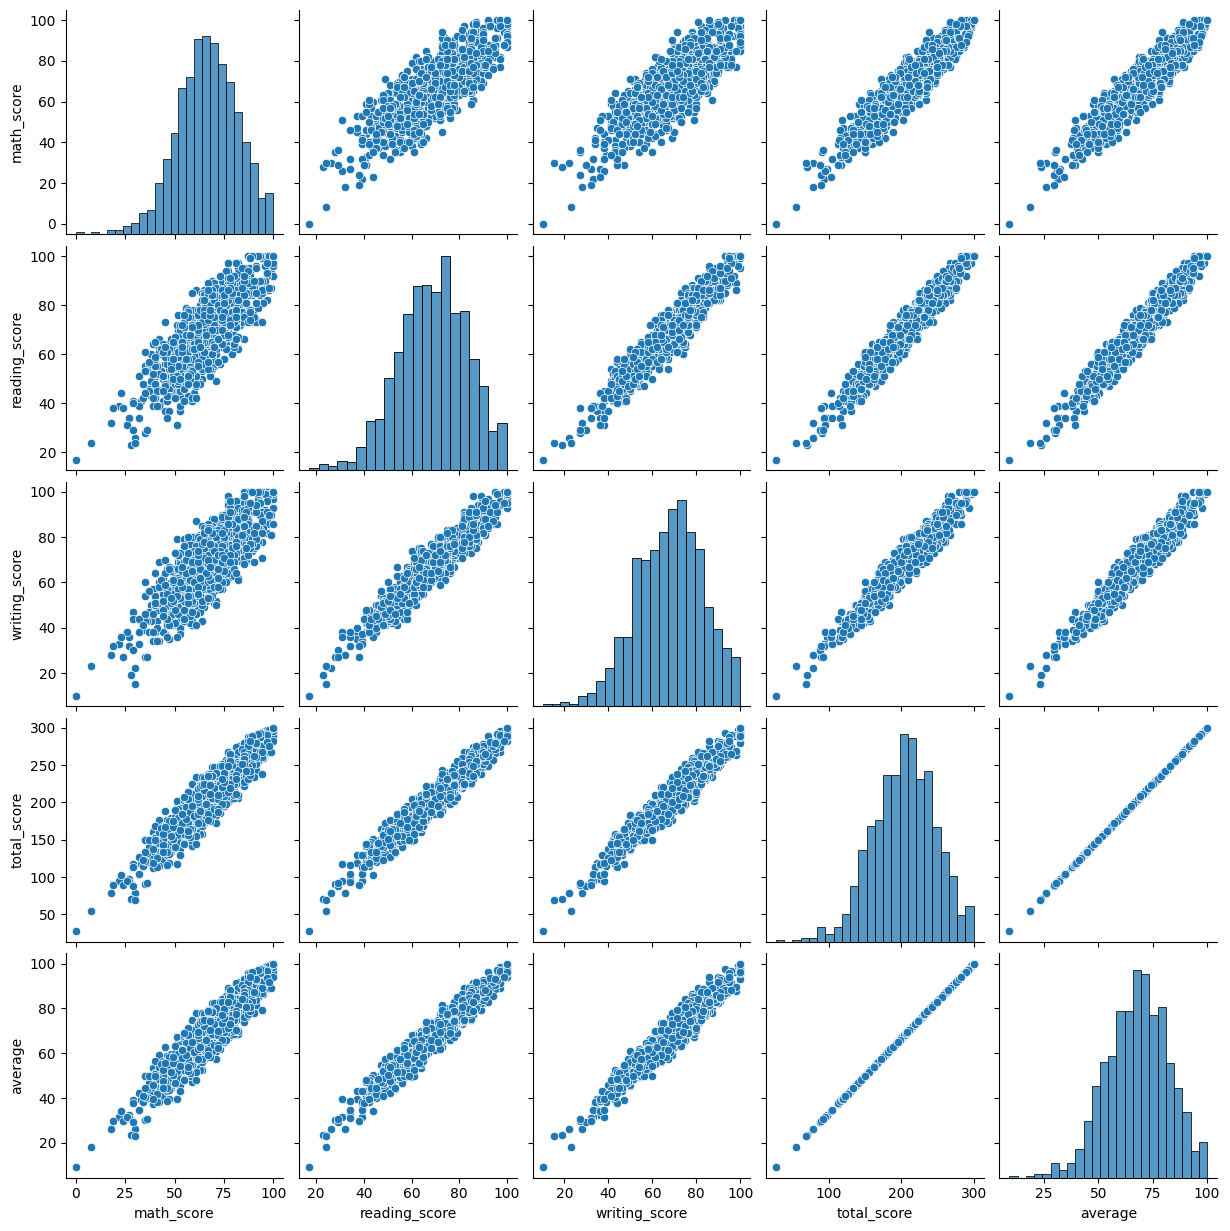

In [131]:
sns.pairplot(df)

<Axes: >

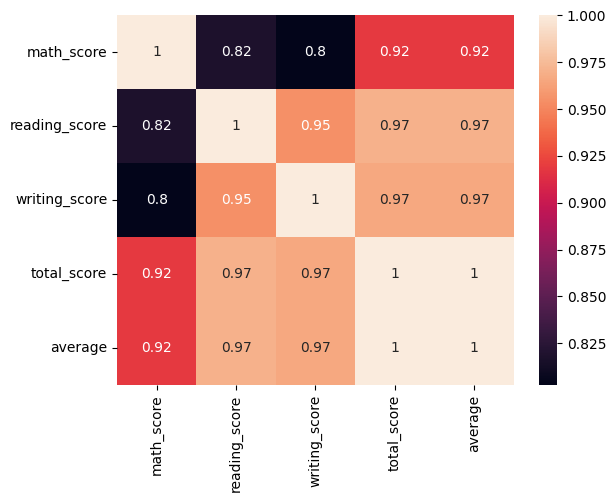

In [139]:
sns.heatmap(df[df.dtypes[df.dtypes!='O'].index].corr(),annot=True)

# Algerian Forest Fires Dataset Project EDA Part
## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps
## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index
## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report** 

**3. Exploratory Data Analysis (EDA) on all Features**


In [168]:
#importtant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#loading dataset
df = pd.read_csv('Resources/Algerian_forest_fires_dataset.csv',header=1)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [169]:
# Convert Dataframe into Dictionary as MongoDB stores data in records/documents
data = df.to_dict(orient = 'records')
data
# # Insert records in the dataset into MongoDB collection "hotel_records"
# db.fire_records.insert_many(data)
# print("All the Data has been Exported to MongoDB Successfully")

[{'day': '01',
  'month': '06',
  'year': '2012',
  'Temperature': '29',
  ' RH': '57',
  ' Ws': '18',
  'Rain ': '0',
  'FFMC': '65.7',
  'DMC': '3.4',
  'DC': '7.6',
  'ISI': '1.3',
  'BUI': '3.4',
  'FWI': '0.5',
  'Classes  ': 'not fire   '},
 {'day': '02',
  'month': '06',
  'year': '2012',
  'Temperature': '29',
  ' RH': '61',
  ' Ws': '13',
  'Rain ': '1.3',
  'FFMC': '64.4',
  'DMC': '4.1',
  'DC': '7.6',
  'ISI': '1',
  'BUI': '3.9',
  'FWI': '0.4',
  'Classes  ': 'not fire   '},
 {'day': '03',
  'month': '06',
  'year': '2012',
  'Temperature': '26',
  ' RH': '82',
  ' Ws': '22',
  'Rain ': '13.1',
  'FFMC': '47.1',
  'DMC': '2.5',
  'DC': '7.1',
  'ISI': '0.3',
  'BUI': '2.7',
  'FWI': '0.1',
  'Classes  ': 'not fire   '},
 {'day': '04',
  'month': '06',
  'year': '2012',
  'Temperature': '25',
  ' RH': '89',
  ' Ws': '13',
  'Rain ': '2.5',
  'FFMC': '28.6',
  'DMC': '1.3',
  'DC': '6.9',
  'ISI': '0',
  'BUI': '1.7',
  'FWI': '0',
  'Classes  ': 'not fire   '},
 {'day': '0

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [171]:
#checking null
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [172]:
# Columns which has null values
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

In [173]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df['Region'] = df['Region'].astype(int)
print(df.dtypes)
df

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object


day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5   not fire          1  
1    0.4   not fire          1  
2    0.1   not fire          1  
3      0   not fire          1  
4    0.5   not fire          1  
..   ...           ...     ...  
241  6.5       fire          2  
242    0   not fire          2  
243  0.2   not fire          2  
244  0.7   not fire          2  
245  0.5  not fire           2  

[246 rows x 15 columns]

In [174]:
#checking null
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [175]:
# Remove null or na values rows
df = df.dropna().reset_index(drop=True)
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5   not fire          1  
1    0.4   not fire          1  
2    0.1   not fire          1  
3      0   not fire          1  
4    0.5   not fire          1  
..   ...           ...     ...  
239  6.5       fire          2  
240    0   not fire          2  
241  0.2   not fire          2  
242  0.7   not fire          2  
243  0.5  not fire           2  

[244 rows x 15 columns]

In [176]:
df[df.isnull().any(axis=1)]
#no null rows left

Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  , Region]
Index: []

In [177]:
df = df.drop(122).reset_index(drop=True)
df.loc[121:123]

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
121  30    09  2012          25  78  14   1.4    45  1.9  7.5  0.2  2.4  0.1   
122  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6  2.8  0.2   
123  02    06  2012          30  73  13     4  55.7  2.7  7.8  0.6  2.9  0.2   

       Classes    Region  
121  not fire          1  
122  not fire          2  
123  not fire          2

In [178]:
# List out column names to check 
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [179]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Changing the required columns as integer data type

In [180]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)
df.dtypes

day             int64
month           int64
year            int64
Temperature     int64
RH              int64
Ws              int64
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

Changing the other columns to Float data type

In [181]:
object = [features for features in df.columns if df[features].dtypes=='O']
for i in object:
    if i!='Classes':
        df[i] = df[i].astype(float)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [183]:
df.describe().T

count         mean        std     min      25%     50%      75%  \
day          243.0    15.761317   8.842552     1.0     8.00    16.0    23.00   
month        243.0     7.502058   1.114793     6.0     7.00     8.0     8.00   
year         243.0  2012.000000   0.000000  2012.0  2012.00  2012.0  2012.00   
Temperature  243.0    32.152263   3.628039    22.0    30.00    32.0    35.00   
RH           243.0    62.041152  14.828160    21.0    52.50    63.0    73.50   
Ws           243.0    15.493827   2.811385     6.0    14.00    15.0    17.00   
Rain         243.0     0.762963   2.003207     0.0     0.00     0.0     0.50   
FFMC         243.0    77.842387  14.349641    28.6    71.85    83.3    88.30   
DMC          243.0    14.680658  12.393040     0.7     5.80    11.3    20.80   
DC           243.0    49.430864  47.665606     6.9    12.35    33.1    69.10   
ISI          243.0     4.742387   4.154234     0.0     1.40     3.5     7.25   
BUI          243.0    16.690535  14.228421     1.1     6.00    12.4    22.65   
FWI          243.0     7.035391   7.440568     0.0     0.70     4.2    11.45   
Region       243.0     1.497942   0.501028     1.0     1.00     1.0     2.00   

                max  
day            31.0  
month           9.0  
year         2012.0  
Temperature    42.0  
RH             90.0  
Ws             29.0  
Rain           16.8  
FFMC           96.0  
DMC            65.9  
DC            220.4  
ISI            19.0  
BUI            68.0  
FWI            31.1  
Region          2.0

#### Data Cleaning in target variable

In [184]:
# Check Unique values of target variable
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

#### Looks like the values were misspaced so we can use str.strip() method

In [185]:
df.Classes= df.Classes.str.strip()
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

#### Region 1 (Bejaia Region)

In [186]:
df[:122]

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0      1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4      5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...  ...   
117   26      9  2012           31  54  11   0.0  82.0  6.0  16.3  2.5  6.2   
118   27      9  2012           31  66  11   0.0  85.7  8.3  24.9  4.0  9.0   
119   28      9  2012           32  47  14   0.7  77.5  7.1   8.8  1.8  6.8   
120   29      9  2012           26  80  16   1.8  47.4  2.9   7.7  0.3  3.0   
121   30      9  2012           25  78  14   1.4  45.0  1.9   7.5  0.2  2.4   

     FWI   Classes  Region  
0    0.5  not fire       1  
1    0.4  not fire       1  
2    0.1  not fire       1  
3    0.0  not fire       1  
4    0.5  not fire       1  
..   ...       ...     ...  
117  1.7  not fire       1  
118  4.1      fire       1  
119  0.9  not fire       1  
120  0.1  not fire       1  
121  0.1  not fire       1  

[122 rows x 15 columns]

#### Region 2 (Sidi-Bel Abbes Region)

In [187]:
df[122:]

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
122    1      6  2012           32  71  12   0.7  57.1   2.5   8.2  0.6   2.8   
123    2      6  2012           30  73  13   4.0  55.7   2.7   7.8  0.6   2.9   
124    3      6  2012           29  80  14   2.0  48.7   2.2   7.6  0.3   2.6   
125    4      6  2012           30  64  14   0.0  79.4   5.2  15.4  2.2   5.6   
126    5      6  2012           32  60  14   0.2  77.1   6.0  17.6  1.8   6.5   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI   Classes  Region  
122  0.2  not fire       2  
123  0.2  not fire       2  
124  0.1  not fire       2  
125  1.0  not fire       2  
126  0.9  not fire       2  
..   ...       ...     ...  
238  6.5      fire       2  
239  0.0  not fire       2  
240  0.2  not fire       2  
241  0.7  not fire       2  
242  0.5  not fire       2  

[121 rows x 15 columns]

In [188]:
#saving cleaned dataset
df.to_csv('Resources/Algerian_forest_fires_dataset_CLEANED.csv',index=False)

## 3.5 Exploratory Data Analysis (EDA)

In [189]:
df

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI   Classes  Region  
0    0.5  not fire       1  
1    0.4  not fire       1  
2    0.1  not fire       1  
3    0.0  not fire       1  
4    0.5  not fire       1  
..   ...       ...     ...  
238  6.5      fire       2  
239  0.0  not fire       2  
240  0.2  not fire       2  
241  0.7  not fire       2  
242  0.5  not fire       2  

[243 rows x 15 columns]

In [196]:
# del(df1)

In [197]:
#Droping Year features 
df1 = df.drop(['day','month','year'], axis=1)

In [198]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes'] = np.where(df1['Classes']=='fire',1,0)
df1

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5        0   
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4        0   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1        0   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0        0   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5        0   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...      ...   
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
238       2  
239       2  
240       2  
241       2  
242       2  

[243 rows x 12 columns]

In [200]:
# Check counts
df1.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Visualization of Distribution

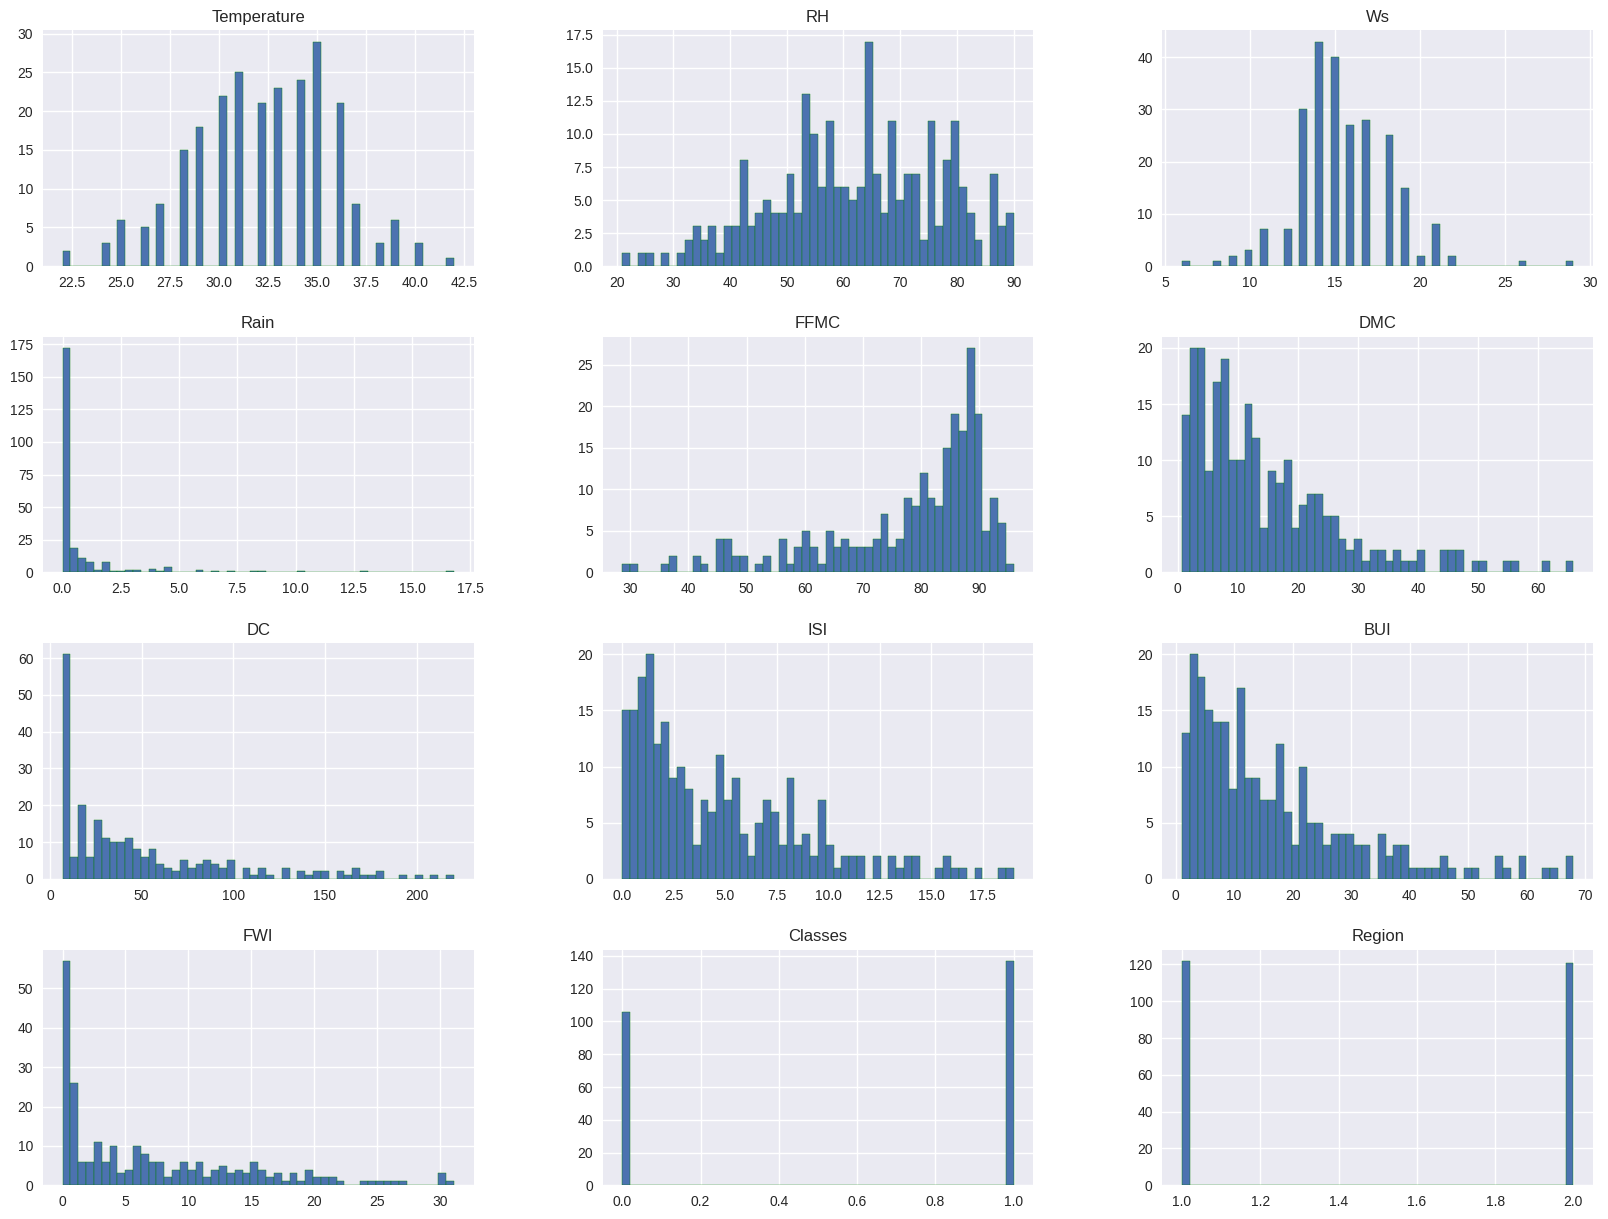

In [204]:
# Plot density plot for all features
plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15),ec='g')
plt.show()

In [206]:
# PLot density plot for all features
percentage = df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

#### Pi-Chart

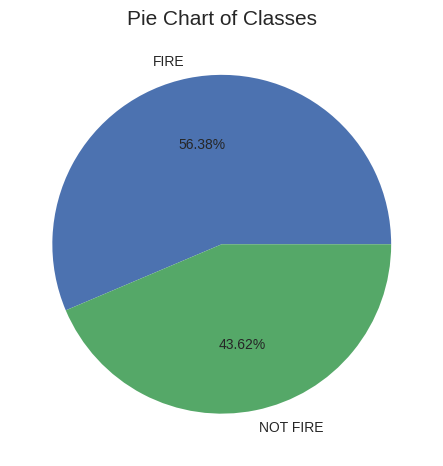

In [217]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.pie(percentage,autopct='%1.2f%%',labels=classeslabels)
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

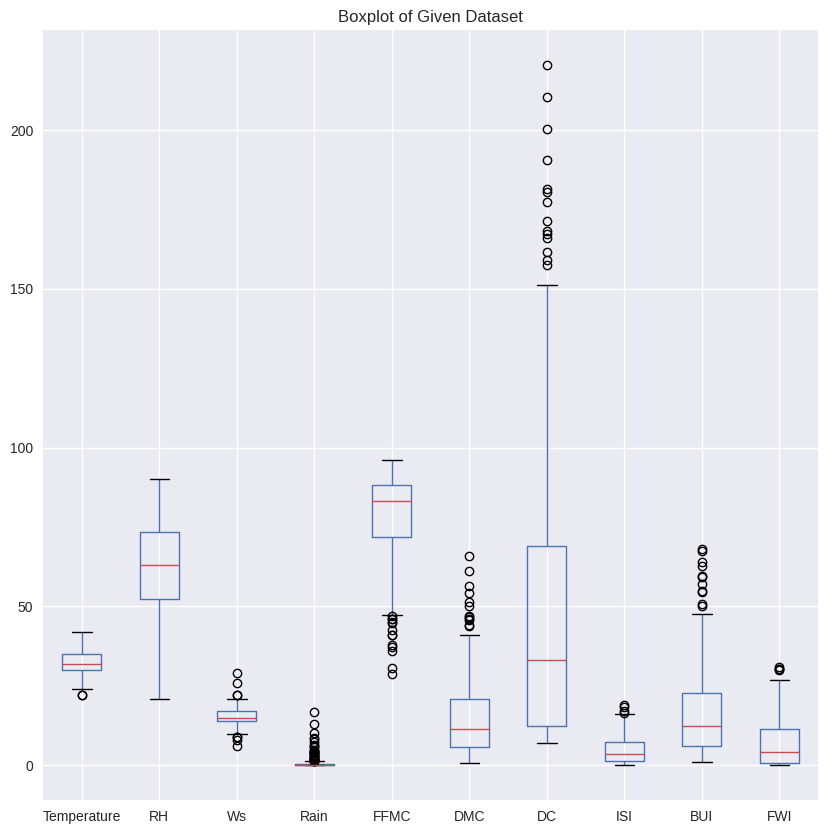

In [223]:
#box plots
featuresForBoxPlot =df1.drop(['Classes','Region'],axis=1)
fig = plt.figure(figsize=(10,10))
ax = featuresForBoxPlot.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

## Weather System Report

In [297]:
#plotting Temperatue range windspeed, rain humidity bar graph and histplot
def barnHist(feature):
    plt.subplots(1,2,figsize=(14,8))
    feature_sum_count = df1.groupby([feature],as_index=False)['Classes'].sum()
    plt.subplot(121)
    ax = sns.barplot(data=feature_sum_count,x=feature_sum_count[feature],y=feature_sum_count['Classes'])
    ax.set(xlabel=feature,ylabel='Fire Count')
    plt.subplot(122)
    ax= sns.histplot(data=df1,x=feature,kde=True,hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.show()

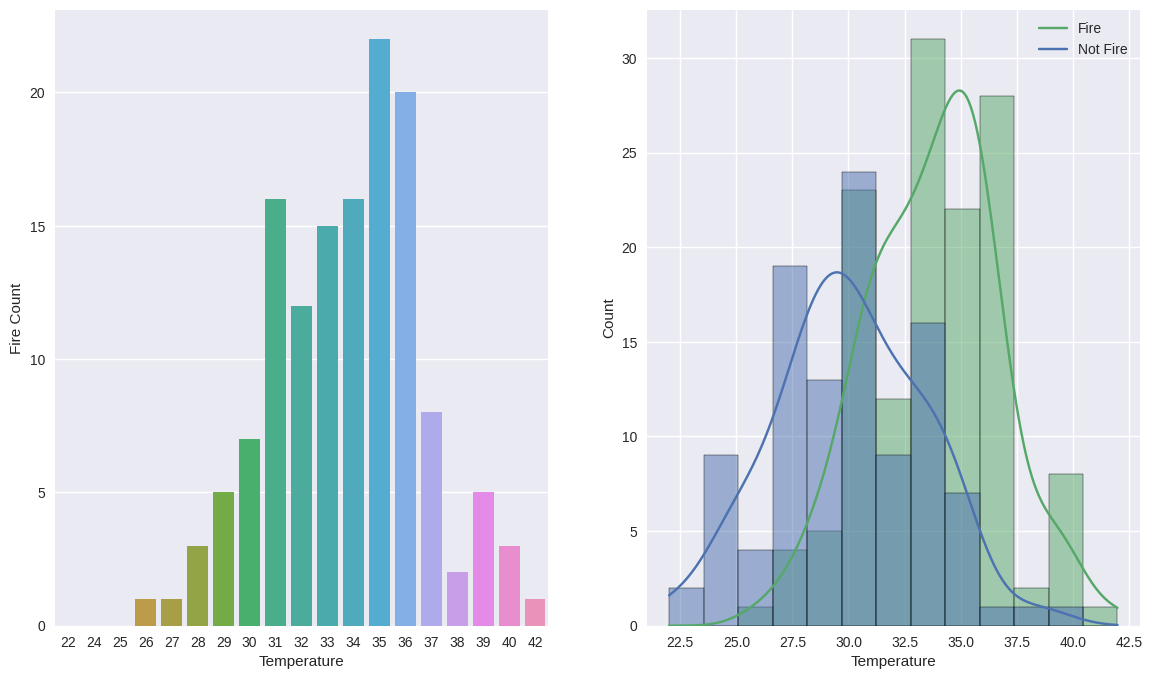

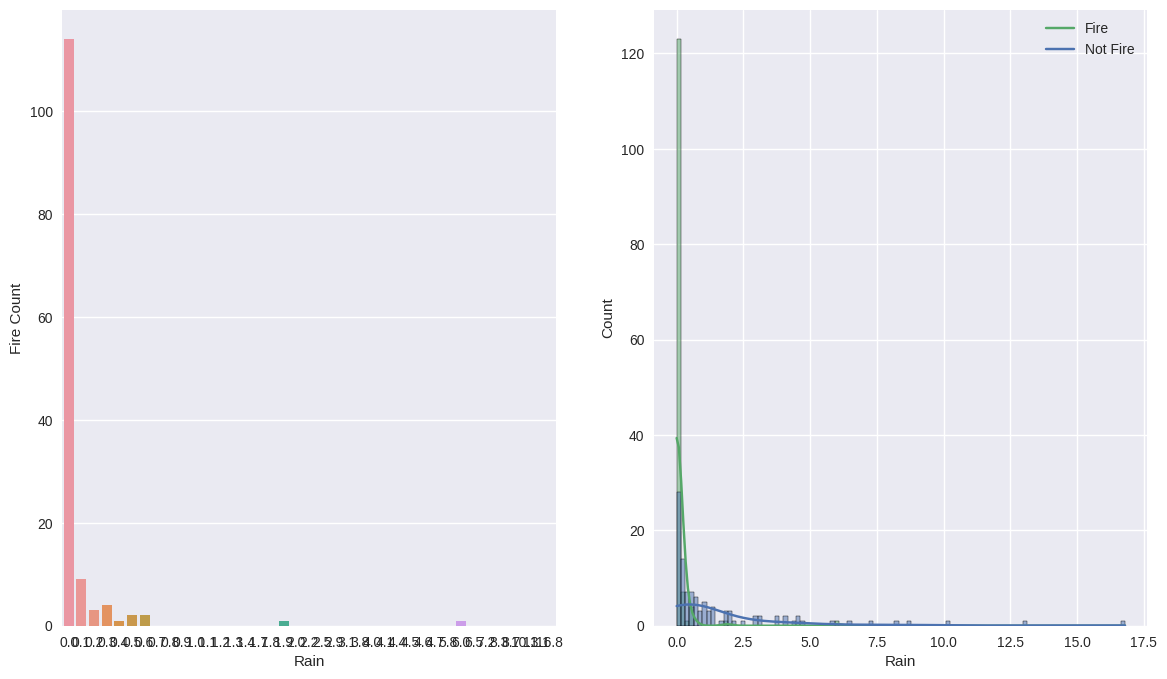

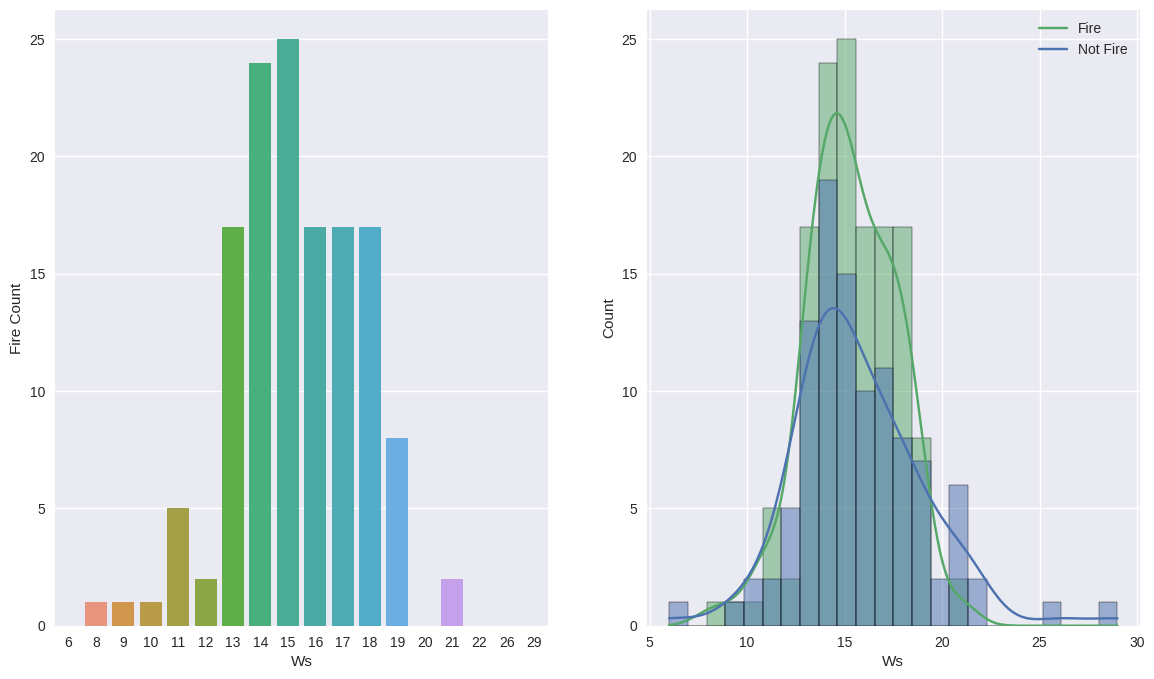

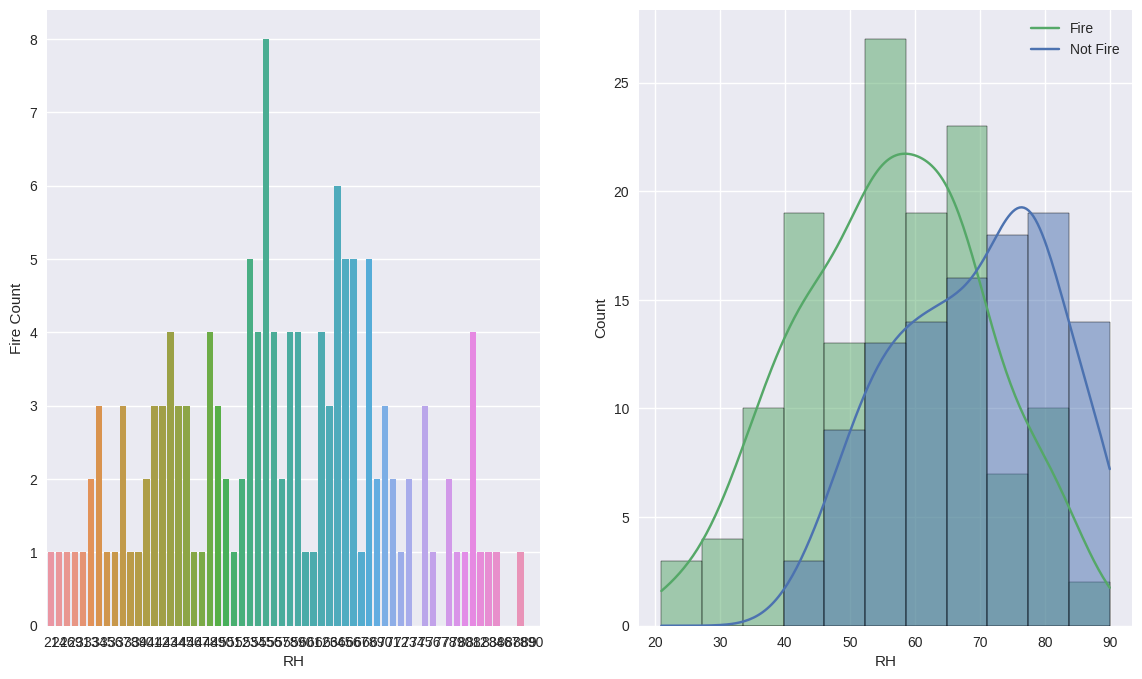

In [298]:
feature_lst = ['Temperature','Rain','Ws','RH']
for i in feature_lst:
    barnHist(i)

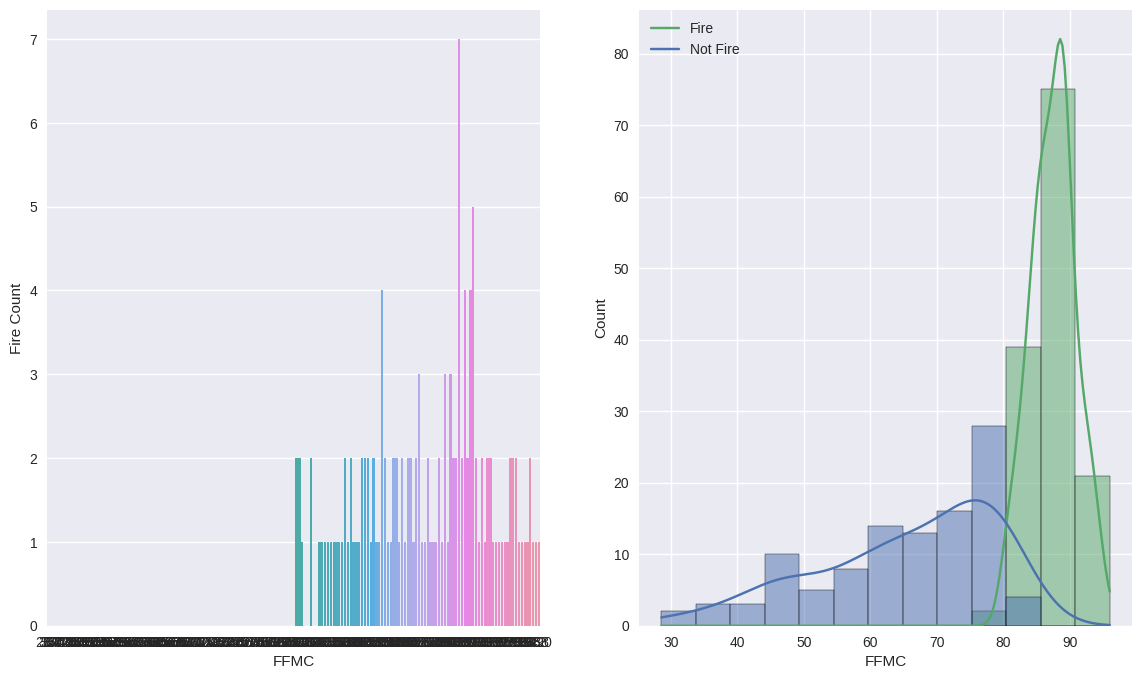

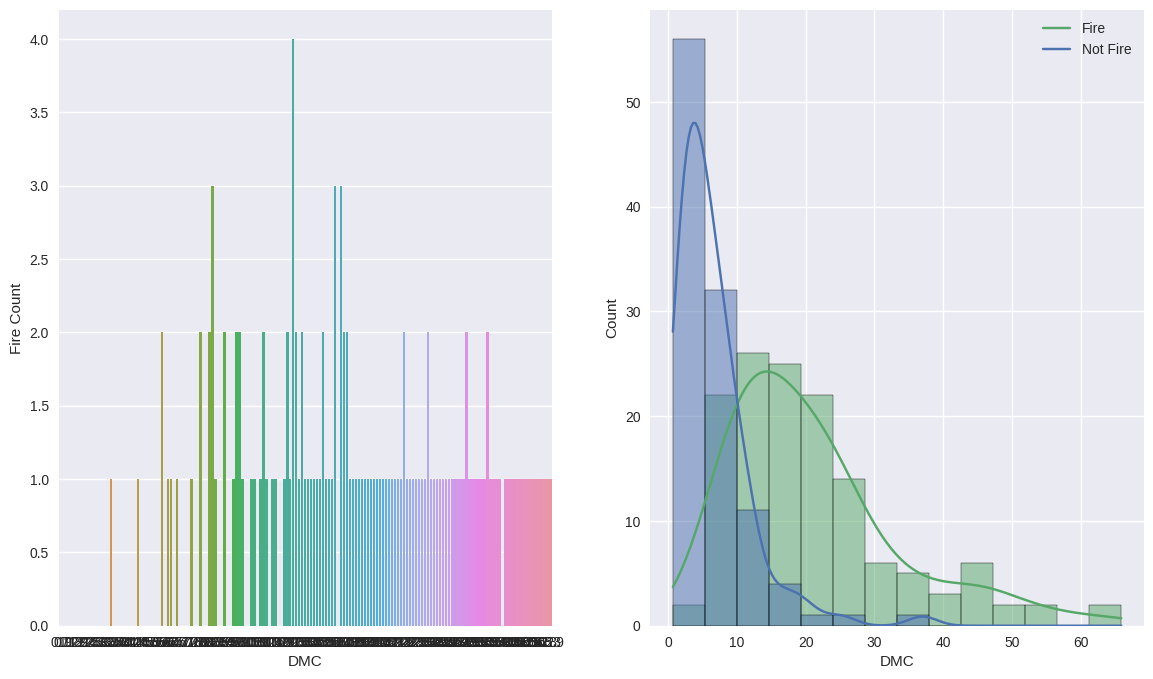

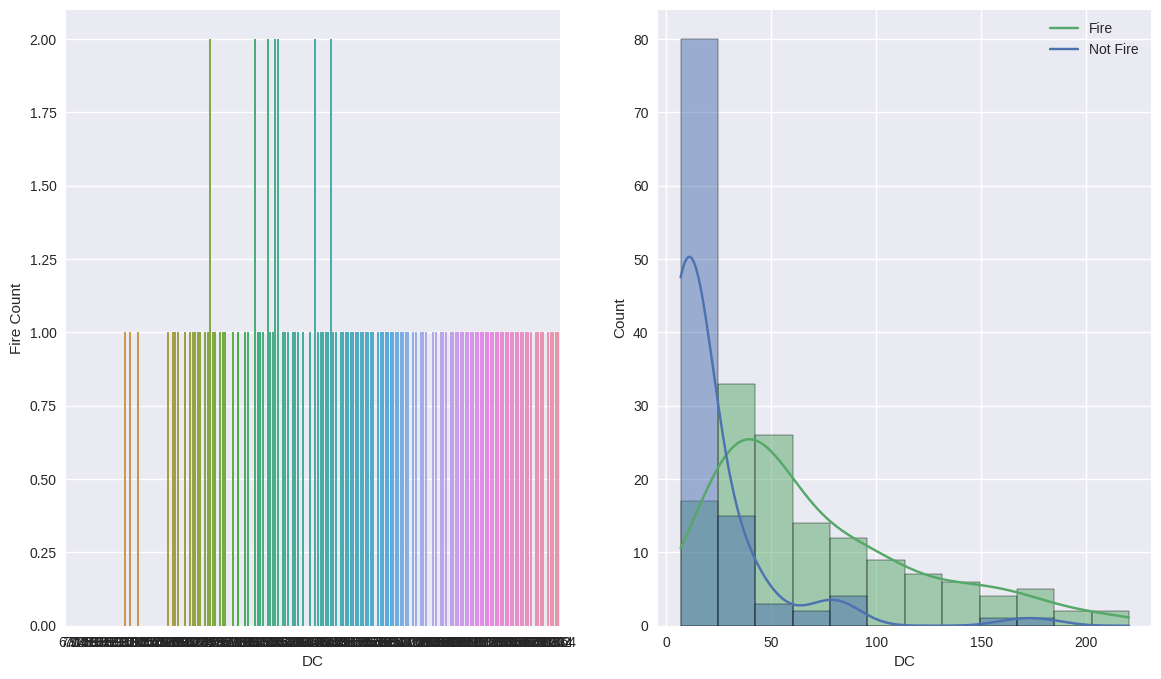

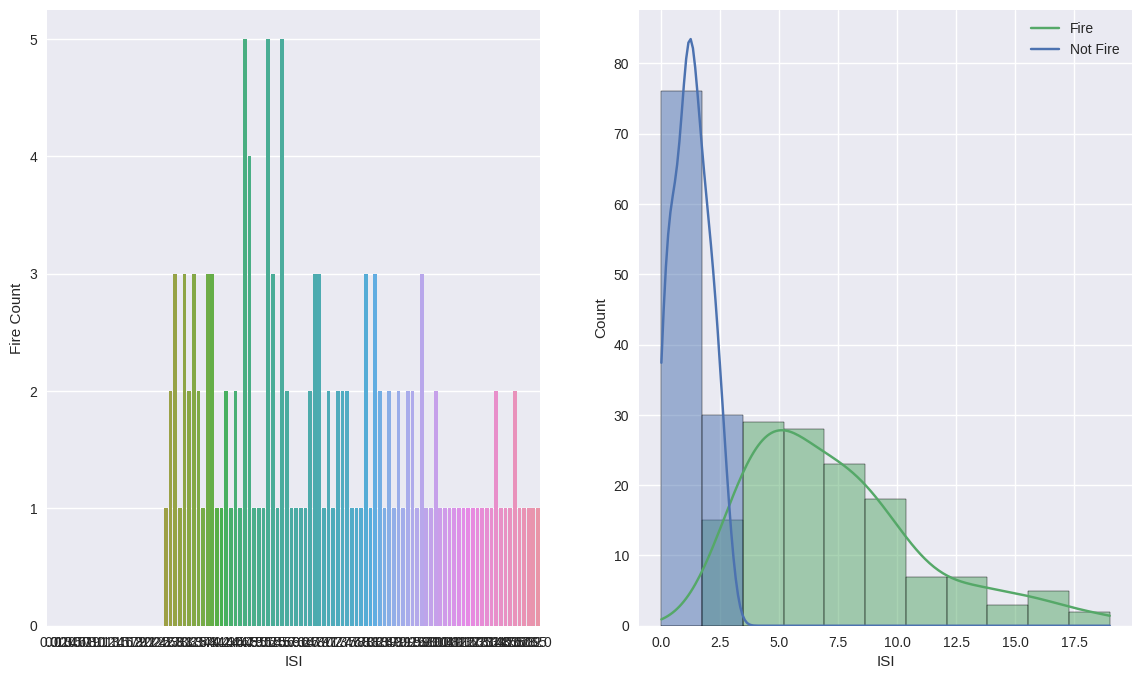

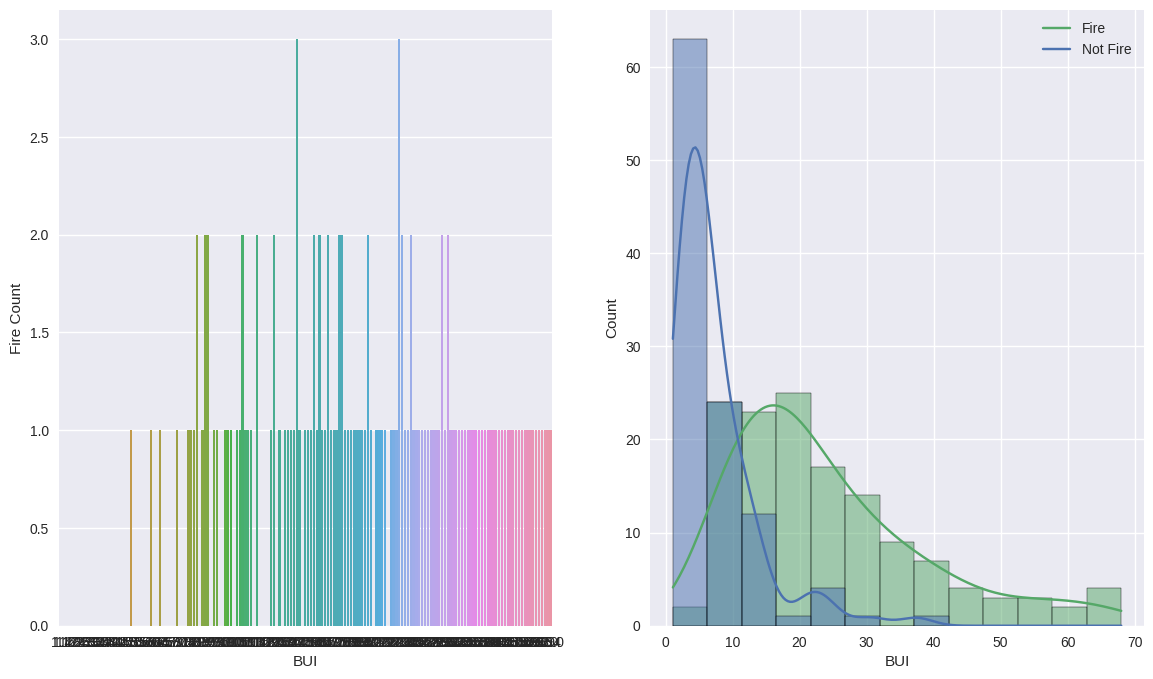

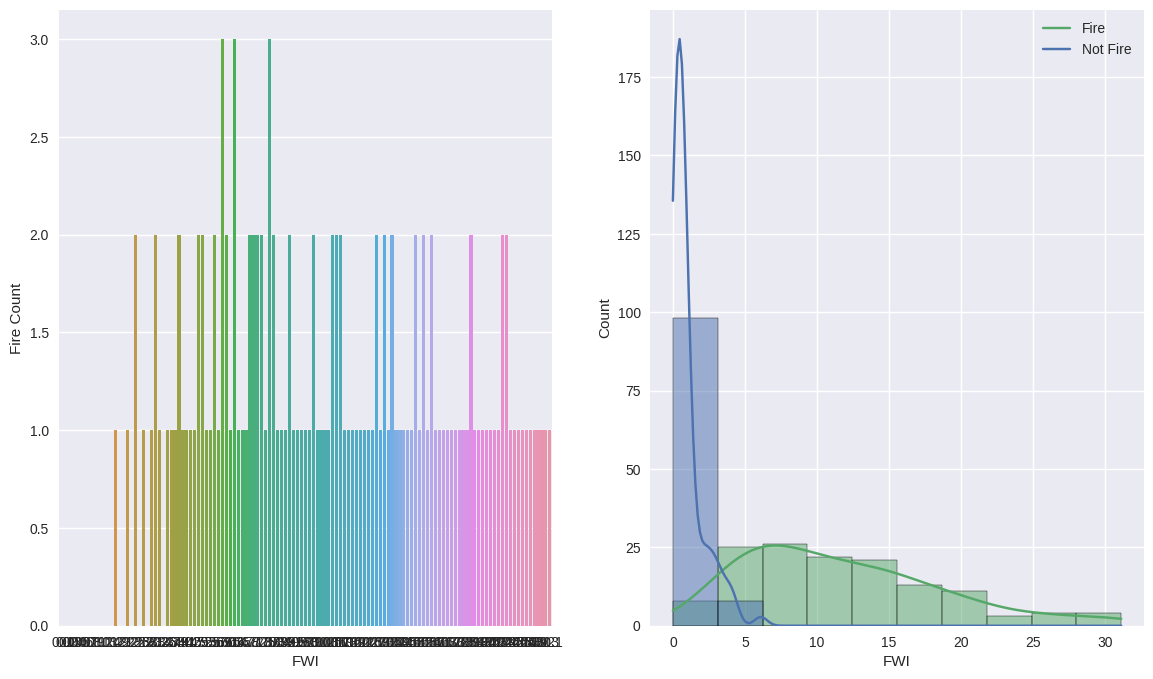

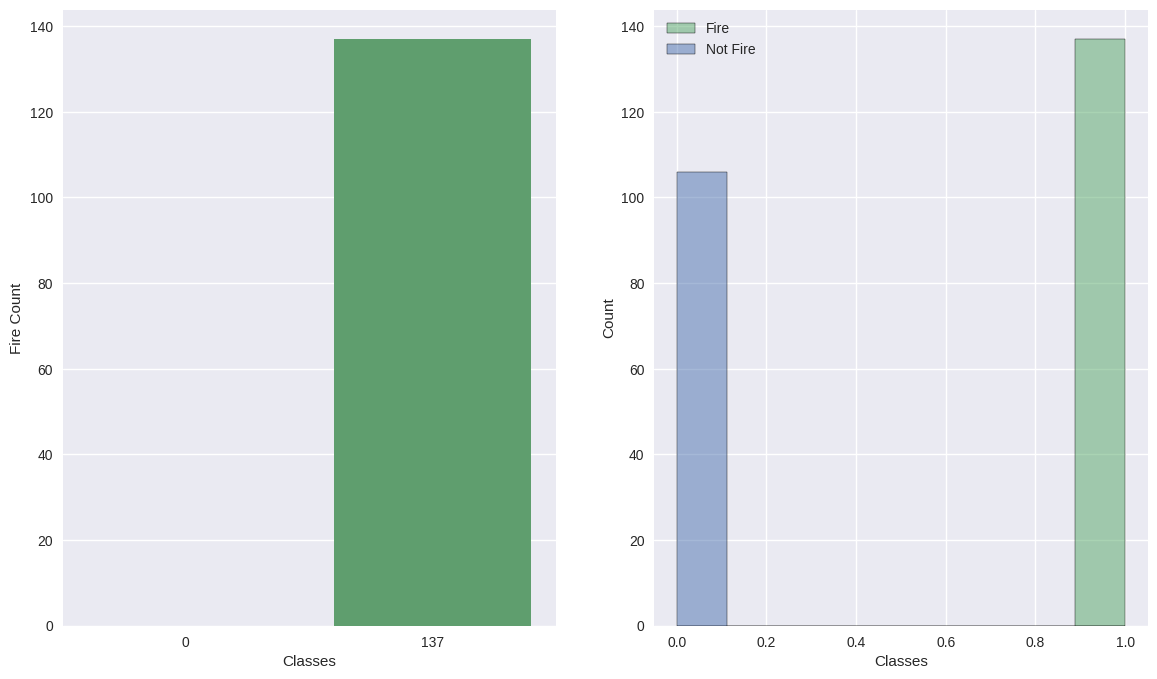

In [299]:
dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
feature_lst = list(dftemp.columns)
for f in feature_lst:
    barnHist(f)

### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.
    